# 機械学習をPythonで実践する-6　　～ 分類器の精度指標 ～

In [36]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# import statsmodels.api as sma
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ 混同行列
* sklearn.metrics.confusion_matrixクラスで混同行列インスタンスを生成
    * confusin_matrix(y_true, y_pred)
    * 戻り値はNumpy Array


* 混同行列(Confusion Matrix)をヒートマップで綺麗に表示する方法。
    * sklearn.metrics.ConfusionMatrixDisplay
    * ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    * confusion_matrix引数にはconfusion_matrix()の戻り値を入れる
    1. インスタンス生成
    2. .plot()メソッドで描画

In [3]:
# データ読み込み
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)

# 予測
y_pred = model.predict(X_test)

In [7]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [14]:
# 混同行列
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

In [12]:
# クラスの順番を表示
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

混同行列は縦に正解ラベルのsetosa,versicolor,virginica、横に予測値のsetosa,versicolor,virginicaとなっている。  
１行２列目の1は正解はversicolorなのに予測値がvirginicaであるという不正解が1件あったことを表す。

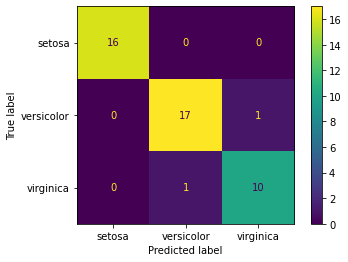

In [17]:
# 視覚的にわかりやすく混同行列を表示する。
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## ○ Accuracy(正解率)
* sklearn.metrics.accuracy_score
    * accuracy_score(y_true, y_pred)

In [26]:
# irisデータの正解率。
accuracy_score(y_test, y_pred)

0.9555555555555556

In [25]:
# 分子は混同行列の対角成分の和になる。
(16+17+10)/(len(y_pred))

0.9555555555555556

## ○ Precision(適合率)
* sklearn.metrics.precision_score
    * precision_score(y_true, y_pred)

In [32]:
# ２値分類に使うことが多いので、サンプルデータを作る
y_true_tmp = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred_tmp = [1, 1, 1, 0, 0, 1, 0, 1]

# Precisionを計算
precision_score(y_true_tmp, y_pred_tmp)

0.6

陽性(=1)と分類した中で実際に陽性である割合は60%とわかる。

## ○ Recall(再現率)
* sklearn.metrics.recall_score
    * recall_score(y_true, y_pred)

In [35]:
# recallを計算
recall_score(y_true_tmp, y_pred_tmp)

0.6

## ○ Specificity
sklearnには実装されていないが、recall_scoreを使って簡単に計算可能。  
→データの陽性と陰性を逆にしてRecallを求めればOK（元々陰性の値が陽性になるので、RecallでSpecificityに相当する値が算出できる）

In [37]:
y_true_tmp

[1, 1, 0, 1, 0, 0, 1, 1]

In [38]:
y_pred_tmp

[1, 1, 1, 0, 0, 1, 0, 1]

In [41]:
# numpy配列化して1との否定をとることで、陰性と陽性を逆にする
np.array(y_true_tmp)!=1

array([False, False,  True, False,  True,  True, False, False])

In [42]:
# 評価指標の各メソッドはbooleanの配列を入れることもできる。（Python的には0,1はbooleanと互換性があるため）
recall_score(np.array(y_true_tmp)!=1, np.array(y_pred_tmp)!=1)

0.3333333333333333